In [1]:
import sys
sys.path.append('/mnt/c/Users/Prasa/OneDrive/dfenn-main')
# sys.path.append('mnt//c/Users/Prasa/OneDrive/dfenn-main/processed_')

import tensorflow as tf
from tensorflow import keras
from keras import *
from keras.models import Sequential
import keras_tuner as kt
import pickle
from modules.train_cnn import *
from modules.process_data import *
from modules.validate import *
import os

os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import typer
from typing_extensions import Annotated


2024-02-06 21:47:43.752835: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-06 21:47:43.952696: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-06 21:47:43.954912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-06 21:47:45.732255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def scramble(
    data_in_path: str,
    data_out_path: str,
    scramble_row: Annotated[bool, typer.Option()] = True,
    free_scramble: Annotated[bool, typer.Option()] = False,
    seed: Annotated[int, typer.Option()] = None,
):
    # read in data
    data_in = pickle.load(open(f"{data_in_path}", "rb"))

    # scramble data and store in a new variable
    scramble_data = []
    # iterate through the data array and alter each tensor
    for tensor in data_in:
        scramble_tensor = scramble_snp_tensor(
            tensor, scramble_row=scramble_row, free_scramble=free_scramble, seed=seed
        )
        scramble_data.append(scramble_tensor)

    # save output scrambled data as a numpy array
    pickle.dump(np.array(scramble_data), open(f"{data_out_path}", "wb"))

In [4]:
pwd

'/mnt/c/Users/Prasa/OneDrive/dfenn-main/All_notebooks_and_files_i_used_in_Star_Lab_project'

In [5]:
scramble('../processed_LD_data/test_data_1B08_varied_scale_2_r2_labeled_tensors', '../processed_LD_data/test_r2_varied_scrambled_tensors')

In [3]:
scramble('../processed_LD_data/r2_vary_data/test_data_1B08_varied_scale_2_r2_labeled_tensors', '../processed_LD_data/r2_vary_data/test_r2_varied_free_scrambled_tensors', free_scramble=True)

In [2]:
r2_varied_train_tensors = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/train_data_1B08_varied_scale_2_r2_labeled_tensors', "rb")))
r2_varied_train_labels = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/train_data_1B08_varied_scale_2_r2_labeled_labels', "rb")))

r2_varied_test_tensors = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/test_data_1B08_varied_scale_2_r2_labeled_tensors', "rb")))
r2_varied_test_labels = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/test_data_1B08_varied_scale_2_r2_labeled_labels', "rb")))

r2_varied_test_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/test_r2_varied_scrambled_tensors', 'rb')))
r2_varied_test_free_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/test_r2_varied_free_scrambled_tensors', 'rb')))

r2_varied_test_partition_by_row_tensors = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/test_r2_varied_partition_by_row_tensors', 'rb')))
r2_varied_test_partition_by_column_tensors = np.array(pickle.load(open('../processed_LD_data/r2_vary_data/test_r2_varied_partition_by_column_tensors', 'rb')))

Epoch 1/30


2024-01-17 20:08:36.501135: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 145680000 exceeds 10% of free system memory.


95/95 [==============================] - 13s 128ms/step - loss: 0.9802 - mean_squared_error: 0.9802
Epoch 2/30
95/95 [==============================] - 11s 115ms/step - loss: 0.6403 - mean_squared_error: 0.6403
Epoch 3/30
95/95 [==============================] - 11s 111ms/step - loss: 0.6207 - mean_squared_error: 0.6207
Epoch 4/30
95/95 [==============================] - 10s 109ms/step - loss: 0.6026 - mean_squared_error: 0.6026
Epoch 5/30
95/95 [==============================] - 11s 111ms/step - loss: 0.5926 - mean_squared_error: 0.5926
Epoch 6/30
95/95 [==============================] - 10s 110ms/step - loss: 0.5826 - mean_squared_error: 0.5826
Epoch 7/30
95/95 [==============================] - 11s 111ms/step - loss: 0.5774 - mean_squared_error: 0.5774
Epoch 8/30
95/95 [==============================] - 11s 112ms/step - loss: 0.5727 - mean_squared_error: 0.5727
Epoch 9/30
95/95 [==============================] - 10s 110ms/step - loss: 0.5717 - mean_squared_error: 0.5717
Epoch 10/30


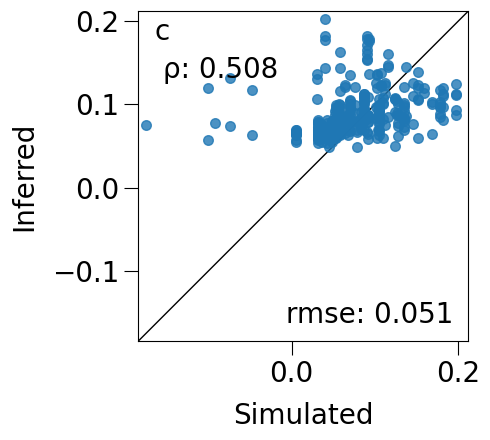

In [3]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])

plot_LD_results(Linh_architecture, r2_varied_test_tensors, r2_varied_test_labels, "../All_my_plots_not_in_my_jupyter_notebooks/r2_varying_scale_orginal_Linh_model_1_17_24")

In [7]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])
Linh_architecture.save('../All_my_models/r2_vary_Linh_org_model_1_27_24')


Epoch 1/30
95/95 [==============================] - 14s 136ms/step - loss: 0.8867 - mean_squared_error: 0.8867
Epoch 2/30
95/95 [==============================] - 11s 118ms/step - loss: 0.6416 - mean_squared_error: 0.6416
Epoch 3/30
95/95 [==============================] - 11s 119ms/step - loss: 0.6084 - mean_squared_error: 0.6084
Epoch 4/30
95/95 [==============================] - 11s 116ms/step - loss: 0.5851 - mean_squared_error: 0.5851
Epoch 5/30
95/95 [==============================] - 11s 114ms/step - loss: 0.5813 - mean_squared_error: 0.5813
Epoch 6/30
95/95 [==============================] - 11s 118ms/step - loss: 0.5822 - mean_squared_error: 0.5822
Epoch 7/30
95/95 [==============================] - 11s 116ms/step - loss: 0.5718 - mean_squared_error: 0.5718
Epoch 8/30
95/95 [==============================] - 11s 115ms/step - loss: 0.5705 - mean_squared_error: 0.5705
Epoch 9/30
95/95 [==============================] - 11s 117ms/step - loss: 0.5724 - mean_squared_error: 0.5724
E

2024-01-27 15:45:49.874136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_3_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_3_input}}]]
2024-01-27 15:45:49.950541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_3_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_3_input}}]]
2024-01-27 15:45:49.973002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,2

INFO:tensorflow:Assets written to: ../All_my_models/r2_vary_Linh_org_model_1_27_24/assets


INFO:tensorflow:Assets written to: ../All_my_models/r2_vary_Linh_org_model_1_27_24/assets


10/10 [==============================] - 1s 71ms/step


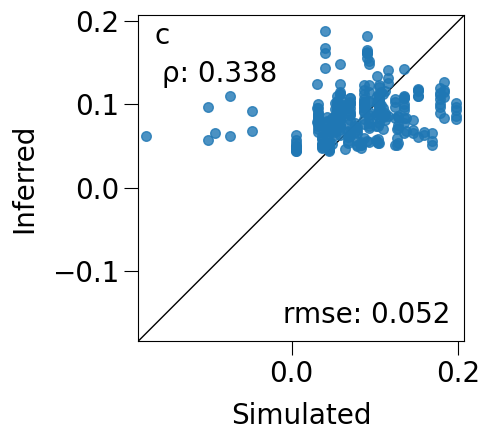

In [8]:
plot_LD_results(Linh_architecture, r2_varied_test_scrambled_tensors, r2_varied_test_labels, '../All_plots_I_plan_to_use_for_final/r2_varied_Linh_org_graphs_for_test_scrambled_tensors')

10/10 [==============================] - 1s 50ms/step


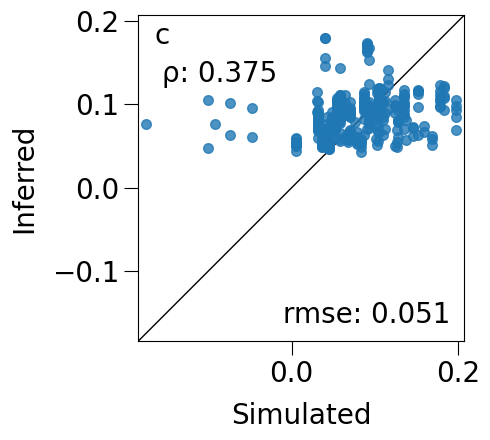

In [9]:
plot_LD_results(Linh_architecture, r2_varied_test_free_scrambled_tensors, r2_varied_test_labels, '../All_plots_I_plan_to_use_for_final/r2_varied_Linh_org_graphs_for_test_free_scrambled_tensors')

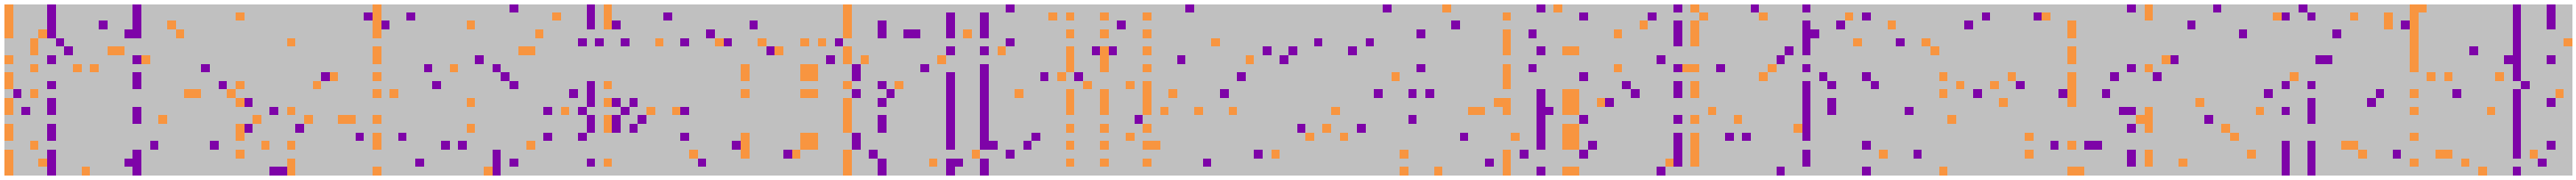

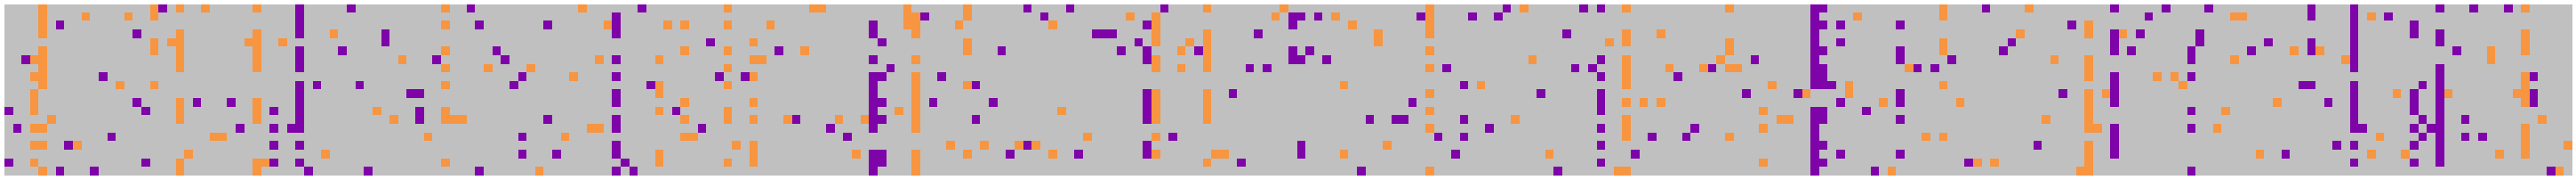

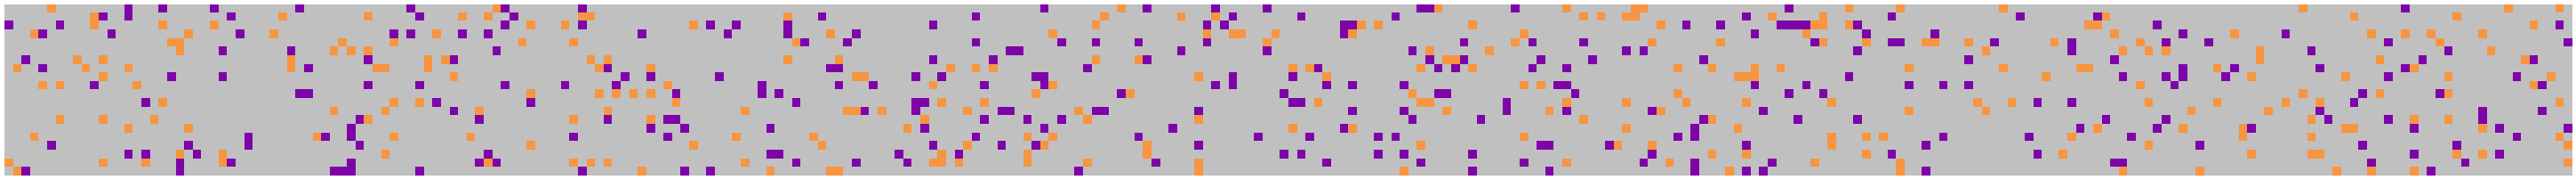

In [10]:
visualize_snp_tensor(r2_varied_test_tensors[0])
visualize_snp_tensor(r2_varied_test_scrambled_tensors[0])
visualize_snp_tensor(r2_varied_test_free_scrambled_tensors[0])

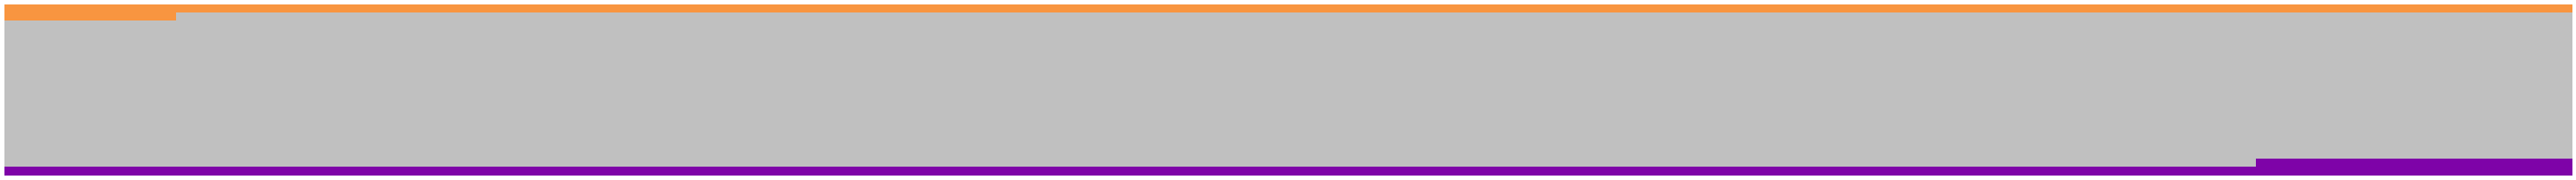

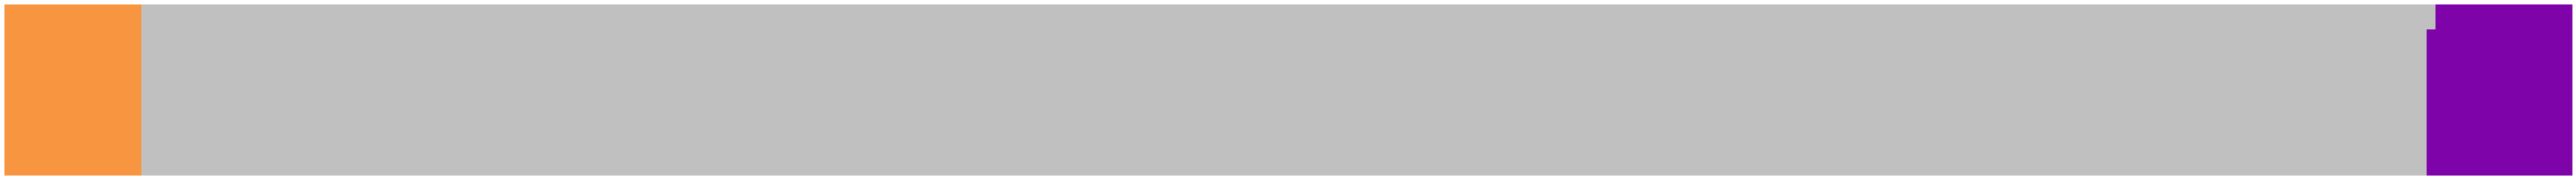

In [3]:
visualize_snp_tensor(r2_varied_test_partition_by_row_tensors[0])
visualize_snp_tensor(r2_varied_test_partition_by_column_tensors[0])

In [4]:
r2_vary_model = tf.keras.saving.load_model('../All_my_models/r2_vary_Linh_org_model_1_27_24/')

10/10 [==============================] - 0s 35ms/step


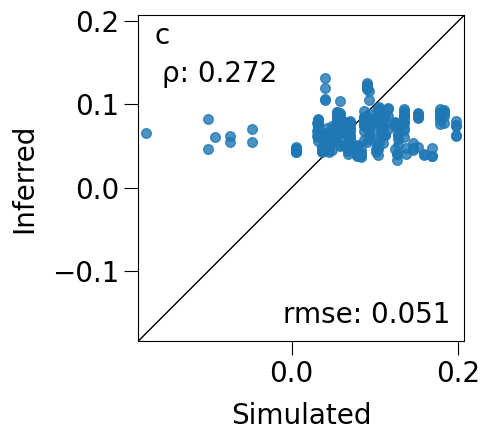

In [5]:
plot_LD_results(r2_vary_model, r2_varied_test_partition_by_row_tensors, r2_varied_test_labels, "../All_plots_I_plan_to_use_for_final/r2_varied_graphs/partition_by_row_scramble_1_28_24")
plot_LD_results(r2_vary_model, r2_varied_test_partition_by_column_tensors, r2_varied_test_labels, "../All_plots_I_plan_to_use_for_final/r2_varied_graphs/partition_by_column_scramble_1_28_24")

In [10]:
r2_varied_train_tensors.shape

(3035, 20, 300, 2)

In [30]:
# New changes to the r^2 CNN 2/6/24
def create_dfe_cnn_r2(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu")) # Kernel size refers to the size of the filter
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
    model.add(layers.AveragePooling2D(pool_size=(20, 4))) # Maybe increasing the pool layer size can help decrease the resolution for the CNN, causing it to focus on bigger trends in the data?
    ''' Converts ouput of conv layer into a smaller matrix and the numbers of that matrix depend on if its taking the average of the region with a 2x2 Filter size with stride = 2 (How much the filter moves over after finishing a region).
     Allows the CNN to look at larger areas of the image since the resolution is less the kinda proportionally the image is smaller. Helps reduce overfitting as parameters in CNN decrease
    after this. The size of the filter is the pool size.
    '''
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D()) # Ask Linh about these pooling layers
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model, kwargs = create_dfe_cnn_r2(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
r2_vary_model.fit(**kwargs, callbacks=[callback])

# r2_vary_model.summary()

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 0.8638 - mean_squared_error: 0.8638WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 11s 108ms/step - loss: 0.8638 - mean_squared_error: 0.8638
Epoch 2/30
95/95 [==============================] - ETA: 0s - loss: 0.6383 - mean_squared_error: 0.6383WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 99ms/step - loss: 0.6383 - mean_squared_error: 0.6383
Epoch 3/30
95/95 [==============================] - ETA: 0s - loss: 0.6147 - mean_squared_error: 0.6147WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.6147 - mean_squared_error: 0.6147
Epoch 4/30
95/95 [==============================] - ETA: 0s - loss: 0.5945 - mean_squared_error: 0.5945WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 99ms/step - loss: 0.5945 - mean_squared_error: 0.5945
Epoch 5/30
95/95 [==============================] - ETA: 0s - loss: 0.5860 - mean_squared_error: 0.5860WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 99ms/step - loss: 0.5860 - mean_squared_error: 0.5860
Epoch 6/30
95/95 [==============================] - ETA: 0s - loss: 0.5790 - mean_squared_error: 0.5790WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.5790 - mean_squared_error: 0.5790
Epoch 7/30
95/95 [==============================] - ETA: 0s - loss: 0.5803 - mean_squared_error: 0.5803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 94ms/step - loss: 0.5803 - mean_squared_error: 0.5803
Epoch 8/30
95/95 [==============================] - ETA: 0s - loss: 0.5770 - mean_squared_error: 0.5770WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 94ms/step - loss: 0.5770 - mean_squared_error: 0.5770
Epoch 9/30
95/95 [==============================] - ETA: 0s - loss: 0.5764 - mean_squared_error: 0.5764WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 93ms/step - loss: 0.5764 - mean_squared_error: 0.5764
Epoch 10/30
95/95 [==============================] - ETA: 0s - loss: 0.5672 - mean_squared_error: 0.5672WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.5672 - mean_squared_error: 0.5672
Epoch 11/30
95/95 [==============================] - ETA: 0s - loss: 0.5649 - mean_squared_error: 0.5649WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.5649 - mean_squared_error: 0.5649
Epoch 12/30
95/95 [==============================] - ETA: 0s - loss: 0.5669 - mean_squared_error: 0.5669WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.5669 - mean_squared_error: 0.5669
Epoch 13/30
95/95 [==============================] - ETA: 0s - loss: 0.5575 - mean_squared_error: 0.5575WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.5575 - mean_squared_error: 0.5575
Epoch 14/30
95/95 [==============================] - ETA: 0s - loss: 0.5508 - mean_squared_error: 0.5508WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 101ms/step - loss: 0.5508 - mean_squared_error: 0.5508
Epoch 15/30
95/95 [==============================] - ETA: 0s - loss: 0.5484 - mean_squared_error: 0.5484WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.5484 - mean_squared_error: 0.5484
Epoch 16/30
95/95 [==============================] - ETA: 0s - loss: 0.5462 - mean_squared_error: 0.5462WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 98ms/step - loss: 0.5462 - mean_squared_error: 0.5462
Epoch 17/30
95/95 [==============================] - ETA: 0s - loss: 0.5451 - mean_squared_error: 0.5451WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.5451 - mean_squared_error: 0.5451
Epoch 18/30
95/95 [==============================] - ETA: 0s - loss: 0.5386 - mean_squared_error: 0.5386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.5386 - mean_squared_error: 0.5386
Epoch 19/30
95/95 [==============================] - ETA: 0s - loss: 0.5370 - mean_squared_error: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.5370 - mean_squared_error: 0.5370
Epoch 20/30
95/95 [==============================] - ETA: 0s - loss: 0.5331 - mean_squared_error: 0.5331WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.5331 - mean_squared_error: 0.5331
Epoch 21/30
95/95 [==============================] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 98ms/step - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 22/30
95/95 [==============================] - ETA: 0s - loss: 0.5323 - mean_squared_error: 0.5323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.5323 - mean_squared_error: 0.5323
Epoch 23/30
95/95 [==============================] - ETA: 0s - loss: 0.5238 - mean_squared_error: 0.5238WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.5238 - mean_squared_error: 0.5238
Epoch 24/30
95/95 [==============================] - ETA: 0s - loss: 0.5201 - mean_squared_error: 0.5201WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.5201 - mean_squared_error: 0.5201
Epoch 25/30
95/95 [==============================] - ETA: 0s - loss: 0.5169 - mean_squared_error: 0.5169WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 98ms/step - loss: 0.5169 - mean_squared_error: 0.5169
Epoch 26/30
95/95 [==============================] - ETA: 0s - loss: 0.5110 - mean_squared_error: 0.5110WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 101ms/step - loss: 0.5110 - mean_squared_error: 0.5110
Epoch 27/30
95/95 [==============================] - ETA: 0s - loss: 0.5094 - mean_squared_error: 0.5094WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 105ms/step - loss: 0.5094 - mean_squared_error: 0.5094
Epoch 28/30
95/95 [==============================] - ETA: 0s - loss: 0.5074 - mean_squared_error: 0.5074WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 107ms/step - loss: 0.5074 - mean_squared_error: 0.5074
Epoch 29/30
95/95 [==============================] - ETA: 0s - loss: 0.4990 - mean_squared_error: 0.4990WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 104ms/step - loss: 0.4990 - mean_squared_error: 0.4990
Epoch 30/30
95/95 [==============================] - ETA: 0s - loss: 0.4977 - mean_squared_error: 0.4977WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 104ms/step - loss: 0.4977 - mean_squared_error: 0.4977


In [31]:
r2_vary_model.save("../All_my_models/r2_vary_model_downsize_pool_layer_2_7_24")

2024-02-07 13:57:42.414700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_45_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_45_input}}]]
2024-02-07 13:57:42.561897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_45_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_45_input}}]]
2024-02-07 13:57:42.587706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape 

INFO:tensorflow:Assets written to: ../All_my_models/r2_vary_model_downsize_pool_layer_2_7_24/assets


INFO:tensorflow:Assets written to: ../All_my_models/r2_vary_model_downsize_pool_layer_2_7_24/assets


10/10 [==============================] - 1s 47ms/step


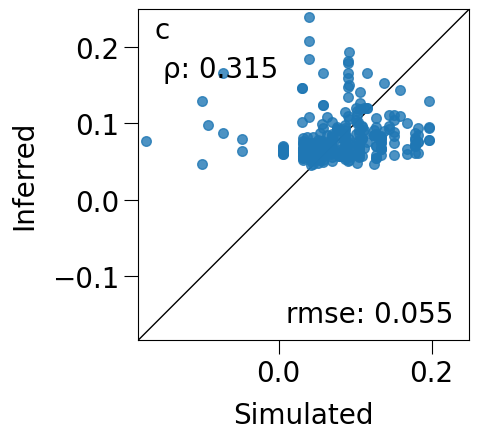

In [32]:
# 2/6/24
plot_LD_results(r2_vary_model, r2_varied_test_tensors, r2_varied_test_labels, "../Downsizing_pooling_layer_r2_vary_change_2_6_24")

In [28]:
r2_vary_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_42 (Conv1D)          (None, 20, 148, 64)       704       
                                                                 
 conv1d_43 (Conv1D)          (None, 20, 146, 32)       6176      
                                                                 
 conv1d_44 (Conv1D)          (None, 20, 73, 16)        1040      
                                                                 
 average_pooling2d_27 (Avera  (None, 1, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 average_pooling2d_28 (Avera  (None, 1, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_13  (None, 16)             

10/10 [==============================] - 0s 40ms/step


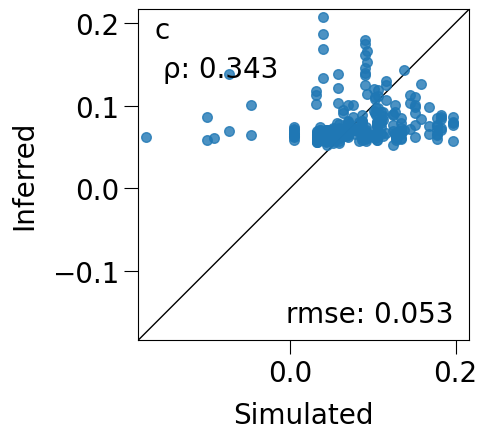

In [33]:
# r2_vary_model.save("../All_my_models/r2_vary_model_pool_layer_shrink_2_7_24")
# 2/7/24
plot_LD_results(r2_vary_model, r2_varied_test_free_scrambled_tensors, r2_varied_test_labels, "../Downsize_pool_layer_free_test_2_7_24")

In [35]:
# New changes to the r^2 CNN 2/7/24
def create_dfe_cnn_r2_layer(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu")) # Kernel size refers to the size of the filter
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
    model.add(layers.AveragePooling2D(pool_size=(20, 1))) 
    ''' Converts ouput of conv layer into a smaller matrix and the numbers of that matrix depend on if its taking the average of the region with a 2x2 Filter size with stride = 2 
    (How much the filter moves over after finishing a region).
     Allows the CNN to look at more aactivated areas of the image from the convolutions in the conv layer. Helps reduce overfitting as parameters in CNN decrease
    after this. The size of the filter is the pool size.
    '''
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D()) # Ask Linh about these pooling layers
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model_layer, kwargs = create_dfe_cnn_r2_layer(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

# callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# r2_vary_model_layer.fit(**kwargs, callbacks=[callback])

r2_vary_model_layer.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 20, 148, 64)       704       
                                                                 
 conv1d_52 (Conv1D)          (None, 20, 146, 32)       6176      
                                                                 
 conv1d_53 (Conv1D)          (None, 20, 73, 16)        1040      
                                                                 
 average_pooling2d_31 (Avera  (None, 1, 73, 16)        0         
 gePooling2D)                                                    
                                                                 
 average_pooling2d_32 (Avera  (None, 1, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_15  (None, 16)             

In [36]:
# New changes to the r^2 CNN 2/7/24
def create_dfe_cnn_r2_conv(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2)) Dropout layers disable a certain amount of neurons in the previous layer iteration so that some neurons don't take over and prevent the next layer from learning from a certain neuron. Helps prevent overfitting
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu")) # Kernel size refers to the size of the filter
    # model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
    model.add(layers.AveragePooling2D(pool_size=(20, 1))) 
    ''' Converts ouput of conv layer into a smaller matrix and the numbers of that matrix depend on if its taking the average of the region with a 2x2 Filter size with stride = 2 
    (How much the filter moves over after finishing a region).
     Allows the CNN to look at more aactivated areas of the image from the convolutions in the conv layer. Helps reduce overfitting as parameters in CNN decrease
    after this. The size of the filter is the pool size.
    '''
    # Can do convolutions on smaller maps given by the average pooling layer. This can maybe extract even more prominent details
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D()) # Takes the average number in each feature map (Channel) given as an input. Like one giant filter, that's why there isn't parameter to input a filter size
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model_conv, kwargs = create_dfe_cnn_r2_conv(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

# callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# r2_vary_model_conv.fit(**kwargs, callbacks=[callback])

r2_vary_model_conv.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_54 (Conv1D)          (None, 20, 148, 64)       704       
                                                                 
 conv1d_55 (Conv1D)          (None, 20, 146, 32)       6176      
                                                                 
 average_pooling2d_33 (Avera  (None, 1, 146, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv1d_56 (Conv1D)          (None, 1, 73, 16)         1040      
                                                                 
 average_pooling2d_34 (Avera  (None, 1, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_16  (None, 16)             

In [ ]:
# THIS CELL IS ONLY FOR SCREENSHOTS OF THE CONV LAYER SWITCH CNN ARCHITECTURE



# def create_dfe_cnn_r2_conv(input_shape: tuple, n_outputs: int):
#     model = Sequential()
#     model.add(
#         layers.Conv1D(
#             filters=64,
#             kernel_size=5,
#             strides=2,
#             input_shape=input_shape,
#             activation="relu",
#         )
#     )
    
#     model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
#     model.add(layers.AveragePooling2D(pool_size=(20, 1))) 

#  # Can do convolutions on smaller maps given by the average pooling layer. This can maybe extract even more prominent details
#     model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
#     model.add(layers.AveragePooling2D(pool_size=(1, 4)))
#     model.add(layers.GlobalAveragePooling2D()) 
#     model.add(layers.Dense(n_outputs))
#     model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

#     return model, {}

# r2_vary_model_conv, kwargs = create_dfe_cnn_r2_conv(r2_varied_train_tensors.shape[1:], 3) 

# kwargs.update(
#     x=r2_varied_train_tensors,
#     y=r2_varied_train_labels,
#     epochs=30,
# )

# # callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# # r2_vary_model_conv.fit(**kwargs, callbacks=[callback])

# r2_vary_model_conv.summary()

In [37]:
callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
r2_vary_model_conv.fit(**kwargs, callbacks=[callback])

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 0.8460 - mean_squared_error: 0.8460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 15s 113ms/step - loss: 0.8460 - mean_squared_error: 0.8460
Epoch 2/30
95/95 [==============================] - ETA: 0s - loss: 0.6372 - mean_squared_error: 0.6372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 102ms/step - loss: 0.6372 - mean_squared_error: 0.6372
Epoch 3/30
95/95 [==============================] - ETA: 0s - loss: 0.6089 - mean_squared_error: 0.6089WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 100ms/step - loss: 0.6089 - mean_squared_error: 0.6089
Epoch 4/30
95/95 [==============================] - ETA: 0s - loss: 0.5961 - mean_squared_error: 0.5961WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 102ms/step - loss: 0.5961 - mean_squared_error: 0.5961
Epoch 5/30
95/95 [==============================] - ETA: 0s - loss: 0.5722 - mean_squared_error: 0.5722WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 99ms/step - loss: 0.5722 - mean_squared_error: 0.5722
Epoch 6/30
95/95 [==============================] - ETA: 0s - loss: 0.5543 - mean_squared_error: 0.5543WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 105ms/step - loss: 0.5543 - mean_squared_error: 0.5543
Epoch 7/30
95/95 [==============================] - ETA: 0s - loss: 0.5448 - mean_squared_error: 0.5448WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 105ms/step - loss: 0.5448 - mean_squared_error: 0.5448
Epoch 8/30
95/95 [==============================] - ETA: 0s - loss: 0.5180 - mean_squared_error: 0.5180WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 11s 116ms/step - loss: 0.5180 - mean_squared_error: 0.5180
Epoch 9/30
95/95 [==============================] - ETA: 0s - loss: 0.5017 - mean_squared_error: 0.5017WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 11s 116ms/step - loss: 0.5017 - mean_squared_error: 0.5017
Epoch 10/30
95/95 [==============================] - ETA: 0s - loss: 0.4979 - mean_squared_error: 0.4979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 11s 118ms/step - loss: 0.4979 - mean_squared_error: 0.4979
Epoch 11/30
95/95 [==============================] - ETA: 0s - loss: 0.4877 - mean_squared_error: 0.4877WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 102ms/step - loss: 0.4877 - mean_squared_error: 0.4877
Epoch 12/30
95/95 [==============================] - ETA: 0s - loss: 0.4802 - mean_squared_error: 0.4802WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 104ms/step - loss: 0.4802 - mean_squared_error: 0.4802
Epoch 13/30
95/95 [==============================] - ETA: 0s - loss: 0.4803 - mean_squared_error: 0.4803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 99ms/step - loss: 0.4803 - mean_squared_error: 0.4803
Epoch 14/30
95/95 [==============================] - ETA: 0s - loss: 0.4729 - mean_squared_error: 0.4729WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 98ms/step - loss: 0.4729 - mean_squared_error: 0.4729
Epoch 15/30
95/95 [==============================] - ETA: 0s - loss: 0.4658 - mean_squared_error: 0.4658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 102ms/step - loss: 0.4658 - mean_squared_error: 0.4658
Epoch 16/30
95/95 [==============================] - ETA: 0s - loss: 0.4730 - mean_squared_error: 0.4730WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 104ms/step - loss: 0.4730 - mean_squared_error: 0.4730
Epoch 17/30
95/95 [==============================] - ETA: 0s - loss: 0.4616 - mean_squared_error: 0.4616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 110ms/step - loss: 0.4616 - mean_squared_error: 0.4616
Epoch 18/30
95/95 [==============================] - ETA: 0s - loss: 0.4668 - mean_squared_error: 0.4668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 10s 100ms/step - loss: 0.4668 - mean_squared_error: 0.4668
Epoch 19/30
95/95 [==============================] - ETA: 0s - loss: 0.4549 - mean_squared_error: 0.4549WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 98ms/step - loss: 0.4549 - mean_squared_error: 0.4549
Epoch 20/30
95/95 [==============================] - ETA: 0s - loss: 0.4546 - mean_squared_error: 0.4546WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.4546 - mean_squared_error: 0.4546
Epoch 21/30
95/95 [==============================] - ETA: 0s - loss: 0.4518 - mean_squared_error: 0.4518WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.4518 - mean_squared_error: 0.4518
Epoch 22/30
95/95 [==============================] - ETA: 0s - loss: 0.4477 - mean_squared_error: 0.4477WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.4477 - mean_squared_error: 0.4477
Epoch 23/30
95/95 [==============================] - ETA: 0s - loss: 0.4471 - mean_squared_error: 0.4471WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 95ms/step - loss: 0.4471 - mean_squared_error: 0.4471
Epoch 24/30
95/95 [==============================] - ETA: 0s - loss: 0.4444 - mean_squared_error: 0.4444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.4444 - mean_squared_error: 0.4444
Epoch 25/30
95/95 [==============================] - ETA: 0s - loss: 0.4430 - mean_squared_error: 0.4430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.4430 - mean_squared_error: 0.4430
Epoch 26/30
95/95 [==============================] - ETA: 0s - loss: 0.4416 - mean_squared_error: 0.4416WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.4416 - mean_squared_error: 0.4416
Epoch 27/30
95/95 [==============================] - ETA: 0s - loss: 0.4401 - mean_squared_error: 0.4401WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.4401 - mean_squared_error: 0.4401
Epoch 28/30
95/95 [==============================] - ETA: 0s - loss: 0.4362 - mean_squared_error: 0.4362WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.4362 - mean_squared_error: 0.4362
Epoch 29/30
95/95 [==============================] - ETA: 0s - loss: 0.4375 - mean_squared_error: 0.4375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 96ms/step - loss: 0.4375 - mean_squared_error: 0.4375
Epoch 30/30
95/95 [==============================] - ETA: 0s - loss: 0.4348 - mean_squared_error: 0.4348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 9s 97ms/step - loss: 0.4348 - mean_squared_error: 0.4348


10/10 [==============================] - 0s 31ms/step


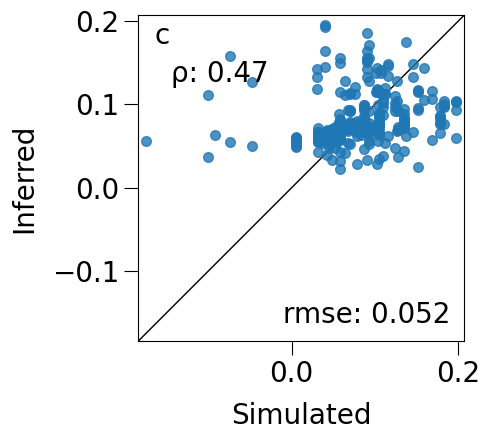

In [38]:
# 2/7/24
plot_LD_results(r2_vary_model_conv, r2_varied_test_tensors, r2_varied_test_labels, "../r2_vary_change_conv_layer_order_graphs")
plot_LD_results(r2_vary_model_conv, r2_varied_test_free_scrambled_tensors, r2_varied_test_labels, "../r2_vary_conv_graphs")

In [39]:
r2_vary_model_conv.save("../r2_vary_conv_order_model")

2024-02-07 20:41:31.790524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_54_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_54_input}}]]
2024-02-07 20:41:31.863155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_54_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_54_input}}]]
2024-02-07 20:41:31.881943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape 

INFO:tensorflow:Assets written to: ../r2_vary_conv_order_model/assets


INFO:tensorflow:Assets written to: ../r2_vary_conv_order_model/assets


10/10 [==============================] - 0s 29ms/step


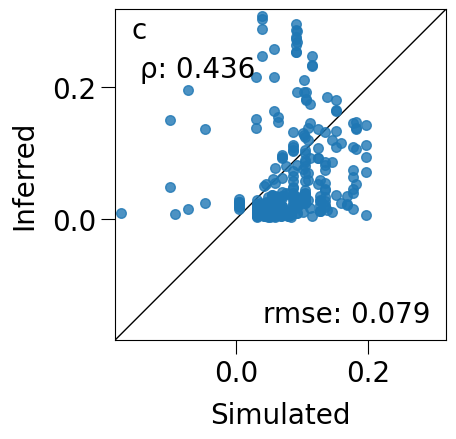

In [40]:
plot_LD_results(r2_vary_model_conv, r2_varied_test_partition_by_row_tensors, r2_varied_test_labels, "../r2_vary_change_conv_layer_order_graphs/Partition_test")

In [42]:
new_pool_downsize_model = tf.keras.saving.load_model('../All_my_models/r2_vary_model_downsize_pool_layer_2_7_24/')

10/10 [==============================] - 0s 29ms/step


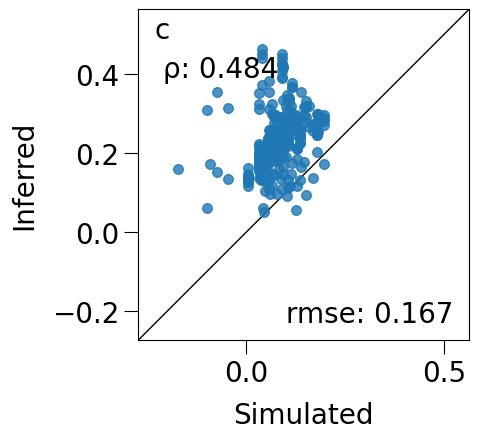

In [43]:
plot_LD_results(r2_vary_model, r2_varied_test_partition_by_row_tensors, r2_varied_test_labels, "../Downsize_pool_layer_parition_by_row_test_2_7_24")

In [44]:
# New changes to the r^2 CNN 2/9/24
def create_dfe_cnn_r2_conv_plus_regularization(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2)) 
    model.add(layers.AveragePooling2D(pool_size=(20, 1))) 
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.2)) # Can help prevent overfitting and make sure not some neurons take over, the arguement is a little small (0.2) because the global average pooling layer already shrinks the feature maps a lot so there aren't many neurons left.
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model_conv_plus_regular, kwargs = create_dfe_cnn_r2_conv_plus_regularization(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

# callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# r2_vary_model_conv_plus_regular.fit(**kwargs, callbacks=[callback])

r2_vary_model_conv_plus_regular.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_57 (Conv1D)          (None, 20, 148, 64)       704       
                                                                 
 average_pooling2d_35 (Avera  (None, 1, 148, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv1d_58 (Conv1D)          (None, 1, 74, 16)         2064      
                                                                 
 average_pooling2d_36 (Avera  (None, 1, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_17  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                     

In [45]:
callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
r2_vary_model_conv_plus_regular.fit(**kwargs, callbacks=[callback])

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 0.9685 - mean_squared_error: 0.9685WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 7s 60ms/step - loss: 0.9685 - mean_squared_error: 0.9685
Epoch 2/30
94/95 [============================>.] - ETA: 0s - loss: 0.7080 - mean_squared_error: 0.7080WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 51ms/step - loss: 0.7068 - mean_squared_error: 0.7068
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 0.6645 - mean_squared_error: 0.6645WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.6630 - mean_squared_error: 0.6630
Epoch 4/30
95/95 [==============================] - ETA: 0s - loss: 0.6382 - mean_squared_error: 0.6382WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.6382 - mean_squared_error: 0.6382
Epoch 5/30
94/95 [============================>.] - ETA: 0s - loss: 0.6140 - mean_squared_error: 0.6140WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.6136 - mean_squared_error: 0.6136
Epoch 6/30
95/95 [==============================] - ETA: 0s - loss: 0.6104 - mean_squared_error: 0.6104WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.6104 - mean_squared_error: 0.6104
Epoch 7/30
95/95 [==============================] - ETA: 0s - loss: 0.5844 - mean_squared_error: 0.5844WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5844 - mean_squared_error: 0.5844
Epoch 8/30
95/95 [==============================] - ETA: 0s - loss: 0.5777 - mean_squared_error: 0.5777WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5777 - mean_squared_error: 0.5777
Epoch 9/30
95/95 [==============================] - ETA: 0s - loss: 0.5737 - mean_squared_error: 0.5737WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5737 - mean_squared_error: 0.5737
Epoch 10/30
95/95 [==============================] - ETA: 0s - loss: 0.5763 - mean_squared_error: 0.5763WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5763 - mean_squared_error: 0.5763
Epoch 11/30
94/95 [============================>.] - ETA: 0s - loss: 0.5759 - mean_squared_error: 0.5759WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5775 - mean_squared_error: 0.5775
Epoch 12/30
95/95 [==============================] - ETA: 0s - loss: 0.5724 - mean_squared_error: 0.5724WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5724 - mean_squared_error: 0.5724
Epoch 13/30
95/95 [==============================] - ETA: 0s - loss: 0.5843 - mean_squared_error: 0.5843WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 49ms/step - loss: 0.5843 - mean_squared_error: 0.5843
Epoch 14/30
95/95 [==============================] - ETA: 0s - loss: 0.5779 - mean_squared_error: 0.5779WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5779 - mean_squared_error: 0.5779
Epoch 15/30
94/95 [============================>.] - ETA: 0s - loss: 0.5713 - mean_squared_error: 0.5713WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5760 - mean_squared_error: 0.5760
Epoch 16/30
94/95 [============================>.] - ETA: 0s - loss: 0.5662 - mean_squared_error: 0.5662WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5678 - mean_squared_error: 0.5678
Epoch 17/30
95/95 [==============================] - ETA: 0s - loss: 0.5696 - mean_squared_error: 0.5696WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5696 - mean_squared_error: 0.5696
Epoch 18/30
94/95 [============================>.] - ETA: 0s - loss: 0.5711 - mean_squared_error: 0.5711WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5686 - mean_squared_error: 0.5686
Epoch 19/30
94/95 [============================>.] - ETA: 0s - loss: 0.5773 - mean_squared_error: 0.5773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5757 - mean_squared_error: 0.5757
Epoch 20/30
95/95 [==============================] - ETA: 0s - loss: 0.5795 - mean_squared_error: 0.5795WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 47ms/step - loss: 0.5795 - mean_squared_error: 0.5795
Epoch 21/30
95/95 [==============================] - ETA: 0s - loss: 0.5700 - mean_squared_error: 0.5700WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5700 - mean_squared_error: 0.5700
Epoch 22/30
95/95 [==============================] - ETA: 0s - loss: 0.5642 - mean_squared_error: 0.5642WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5642 - mean_squared_error: 0.5642
Epoch 23/30
94/95 [============================>.] - ETA: 0s - loss: 0.5661 - mean_squared_error: 0.5661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5673 - mean_squared_error: 0.5673
Epoch 24/30
94/95 [============================>.] - ETA: 0s - loss: 0.5650 - mean_squared_error: 0.5650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5694 - mean_squared_error: 0.5694
Epoch 25/30
94/95 [============================>.] - ETA: 0s - loss: 0.5744 - mean_squared_error: 0.5744WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5715 - mean_squared_error: 0.5715
Epoch 26/30
94/95 [============================>.] - ETA: 0s - loss: 0.5748 - mean_squared_error: 0.5748WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5741 - mean_squared_error: 0.5741
Epoch 27/30
94/95 [============================>.] - ETA: 0s - loss: 0.5661 - mean_squared_error: 0.5661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5634 - mean_squared_error: 0.5634
Epoch 28/30
95/95 [==============================] - ETA: 0s - loss: 0.5695 - mean_squared_error: 0.5695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5695 - mean_squared_error: 0.5695
Epoch 29/30
94/95 [============================>.] - ETA: 0s - loss: 0.5685 - mean_squared_error: 0.5685WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5714 - mean_squared_error: 0.5714
Epoch 30/30
94/95 [============================>.] - ETA: 0s - loss: 0.5768 - mean_squared_error: 0.5768WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 45ms/step - loss: 0.5753 - mean_squared_error: 0.5753


10/10 [==============================] - 0s 23ms/step


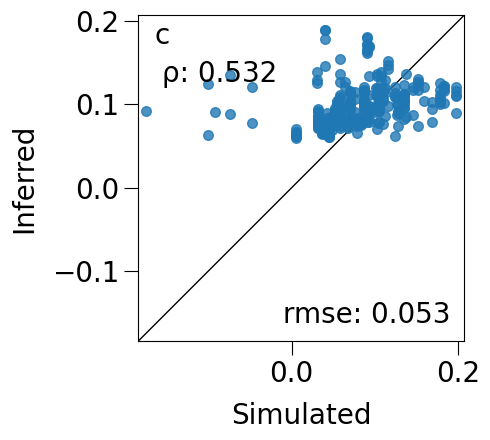

In [46]:
plot_LD_results(r2_vary_model_conv_plus_regular, r2_varied_test_tensors, r2_varied_test_labels, "../r2_vary_change_conv_layer_order_plus_dropout_graphs")

In [49]:
# New changes to the r^2 CNN 2/9/24
def create_dfe_cnn_r2_conv_plus_drop(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2)) 
    model.add(layers.AveragePooling2D(pool_size=(20, 1))) 
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu")) 
    model.add(layers.Dropout(0.35)) # Can help prevent overfitting and make sure not some neurons take over, the arguement is not too big but not too small (0.35) because the previous conv1d layer should create 16 more feature maps for the CNN to work with
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model_conv_plus_drop, kwargs = create_dfe_cnn_r2_conv_plus_drop(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

# callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# r2_vary_model_conv_plus_drop.fit(**kwargs, callbacks=[callback])

r2_vary_model_conv_plus_drop.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_63 (Conv1D)          (None, 20, 148, 64)       704       
                                                                 
 average_pooling2d_41 (Avera  (None, 1, 148, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv1d_64 (Conv1D)          (None, 1, 74, 16)         2064      
                                                                 
 dropout_3 (Dropout)         (None, 1, 74, 16)         0         
                                                                 
 average_pooling2d_42 (Avera  (None, 1, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_20  (None, 16)             

In [50]:
callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
r2_vary_model_conv_plus_drop.fit(**kwargs, callbacks=[callback])

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 1.0072 - mean_squared_error: 1.0072WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 6s 54ms/step - loss: 1.0072 - mean_squared_error: 1.0072
Epoch 2/30
94/95 [============================>.] - ETA: 0s - loss: 0.6844 - mean_squared_error: 0.6844WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.6843 - mean_squared_error: 0.6843
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 0.6119 - mean_squared_error: 0.6119WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 50ms/step - loss: 0.6132 - mean_squared_error: 0.6132
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 0.5773 - mean_squared_error: 0.5773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5791 - mean_squared_error: 0.5791
Epoch 5/30
95/95 [==============================] - ETA: 0s - loss: 0.5635 - mean_squared_error: 0.5635WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5635 - mean_squared_error: 0.5635
Epoch 6/30
94/95 [============================>.] - ETA: 0s - loss: 0.5613 - mean_squared_error: 0.5613WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5601 - mean_squared_error: 0.5601
Epoch 7/30
94/95 [============================>.] - ETA: 0s - loss: 0.5607 - mean_squared_error: 0.5607WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 50ms/step - loss: 0.5585 - mean_squared_error: 0.5585
Epoch 8/30
94/95 [============================>.] - ETA: 0s - loss: 0.5532 - mean_squared_error: 0.5532WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5522 - mean_squared_error: 0.5522
Epoch 9/30
94/95 [============================>.] - ETA: 0s - loss: 0.5508 - mean_squared_error: 0.5508WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5483 - mean_squared_error: 0.5483
Epoch 10/30
95/95 [==============================] - ETA: 0s - loss: 0.5472 - mean_squared_error: 0.5472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 49ms/step - loss: 0.5472 - mean_squared_error: 0.5472
Epoch 11/30
95/95 [==============================] - ETA: 0s - loss: 0.5551 - mean_squared_error: 0.5551WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5551 - mean_squared_error: 0.5551
Epoch 12/30
95/95 [==============================] - ETA: 0s - loss: 0.5447 - mean_squared_error: 0.5447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5447 - mean_squared_error: 0.5447
Epoch 13/30
95/95 [==============================] - ETA: 0s - loss: 0.5444 - mean_squared_error: 0.5444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 49ms/step - loss: 0.5444 - mean_squared_error: 0.5444
Epoch 14/30
94/95 [============================>.] - ETA: 0s - loss: 0.5450 - mean_squared_error: 0.5450WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5443 - mean_squared_error: 0.5443
Epoch 15/30
95/95 [==============================] - ETA: 0s - loss: 0.5447 - mean_squared_error: 0.5447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5447 - mean_squared_error: 0.5447
Epoch 16/30
94/95 [============================>.] - ETA: 0s - loss: 0.5493 - mean_squared_error: 0.5493WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 47ms/step - loss: 0.5479 - mean_squared_error: 0.5479
Epoch 17/30
94/95 [============================>.] - ETA: 0s - loss: 0.5362 - mean_squared_error: 0.5362WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5416 - mean_squared_error: 0.5416
Epoch 18/30
94/95 [============================>.] - ETA: 0s - loss: 0.5454 - mean_squared_error: 0.5454WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5433 - mean_squared_error: 0.5433
Epoch 19/30
95/95 [==============================] - ETA: 0s - loss: 0.5474 - mean_squared_error: 0.5474WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5474 - mean_squared_error: 0.5474
Epoch 20/30
94/95 [============================>.] - ETA: 0s - loss: 0.5479 - mean_squared_error: 0.5479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5463 - mean_squared_error: 0.5463
Epoch 21/30
94/95 [============================>.] - ETA: 0s - loss: 0.5434 - mean_squared_error: 0.5434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5416 - mean_squared_error: 0.5416
Epoch 22/30
94/95 [============================>.] - ETA: 0s - loss: 0.5414 - mean_squared_error: 0.5414WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 46ms/step - loss: 0.5392 - mean_squared_error: 0.5392
Epoch 23/30
94/95 [============================>.] - ETA: 0s - loss: 0.5434 - mean_squared_error: 0.5434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5421 - mean_squared_error: 0.5421
Epoch 24/30
94/95 [============================>.] - ETA: 0s - loss: 0.5393 - mean_squared_error: 0.5393WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5385 - mean_squared_error: 0.5385
Epoch 25/30
95/95 [==============================] - ETA: 0s - loss: 0.5404 - mean_squared_error: 0.5404WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5404 - mean_squared_error: 0.5404
Epoch 26/30
94/95 [============================>.] - ETA: 0s - loss: 0.5416 - mean_squared_error: 0.5416WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5410 - mean_squared_error: 0.5410
Epoch 27/30
94/95 [============================>.] - ETA: 0s - loss: 0.5411 - mean_squared_error: 0.5411WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5407 - mean_squared_error: 0.5407
Epoch 28/30
95/95 [==============================] - ETA: 0s - loss: 0.5385 - mean_squared_error: 0.5385WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 47ms/step - loss: 0.5385 - mean_squared_error: 0.5385
Epoch 29/30
94/95 [============================>.] - ETA: 0s - loss: 0.5386 - mean_squared_error: 0.5386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 47ms/step - loss: 0.5361 - mean_squared_error: 0.5361
Epoch 30/30
95/95 [==============================] - ETA: 0s - loss: 0.5370 - mean_squared_error: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 5s 48ms/step - loss: 0.5370 - mean_squared_error: 0.5370


10/10 [==============================] - 0s 23ms/step


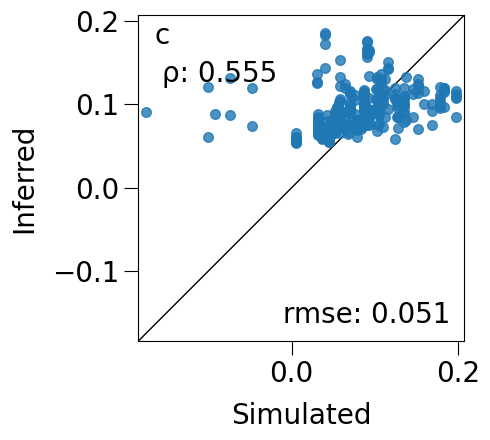

In [51]:
plot_LD_results(r2_vary_model_conv_plus_drop, r2_varied_test_tensors, r2_varied_test_labels, "../r2_vary_change_conv_layer_order_plus_dropout_graphs")

10/10 [==============================] - 0s 24ms/step


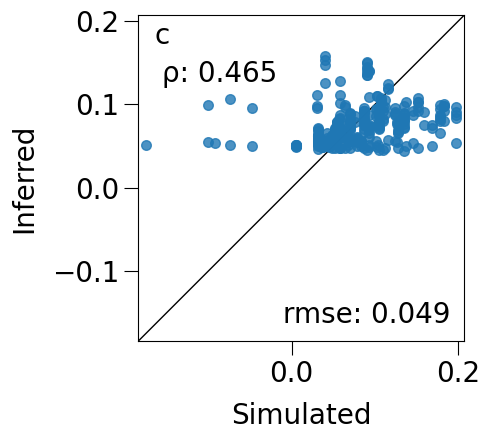

In [52]:
plot_LD_results(r2_vary_model_conv_plus_drop, r2_varied_test_free_scrambled_tensors, r2_varied_test_labels, "../r2_vary_change_conv_layer_order_plus_dropout_graphs/Free_scramble_test")
plot_LD_results(r2_vary_model_conv_plus_drop, r2_varied_test_partition_by_row_tensors, r2_varied_test_labels, "../r2_vary_change_conv_layer_order_plus_dropout_graphs/Partition_by_row_test")


In [53]:
r2_vary_model_conv_plus_drop.save("../r2_vary_model_conv_shift_dropout_after_second_conv_2_9_24")
r2_vary_model_conv_plus_regular.save("../r2_vary_model_conv_shift_plus_dropout_at_end_2_9_24")

2024-02-09 23:06:32.259048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_63_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_63_input}}]]
2024-02-09 23:06:32.392659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_63_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_63_input}}]]
2024-02-09 23:06:32.440451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape 

INFO:tensorflow:Assets written to: ../r2_vary_model_conv_shift_dropout_after_second_conv_2_9_24/assets


INFO:tensorflow:Assets written to: ../r2_vary_model_conv_shift_dropout_after_second_conv_2_9_24/assets
2024-02-09 23:06:33.928779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_57_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_57_input}}]]
2024-02-09 23:06:33.996534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'conv1d_57_input' with dtype float and shape [?,20,300,2]
	 [[{{node conv1d_57_input}}]]
2024-02-09 23:06:34.023862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this messag

INFO:tensorflow:Assets written to: ../r2_vary_model_conv_shift_plus_dropout_at_end_2_9_24/assets


INFO:tensorflow:Assets written to: ../r2_vary_model_conv_shift_plus_dropout_at_end_2_9_24/assets


In [54]:
r2_varied_test_tensors.shape

(318, 20, 300, 2)

In [60]:
# New changes to the r^2 CNN 2/10/24
def create_r2_2d_conv(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv2D(
            filters=64,
            kernel_size=5,
            strides=(2,2),
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2)) 
    model.add(layers.AveragePooling2D(pool_size=(5, 1))) 
    model.add(layers.Conv2D(filters=16, kernel_size=(1,2), strides=2, activation="relu")) 
    model.add(layers.Dropout(0.35)) # Can help prevent overfitting and make sure not some neurons take over, the arguement is not too big but not too small (0.35) because the previous conv1d layer should create 16 more feature maps for the CNN to work with
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model_2d_conv, kwargs = create_r2_2d_conv(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

# callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# r2_vary_model_2d_conv.fit(**kwargs, callbacks=[callback])

r2_vary_model_2d_conv.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 148, 64)        3264      
                                                                 
 average_pooling2d_47 (Avera  (None, 1, 148, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 74, 16)         2064      
                                                                 
 dropout_5 (Dropout)         (None, 1, 74, 16)         0         
                                                                 
 average_pooling2d_48 (Avera  (None, 1, 18, 16)        0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_22  (None, 16)             

In [61]:
callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
r2_vary_model_2d_conv.fit(**kwargs, callbacks=[callback])

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 0.8362 - mean_squared_error: 0.8362WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 29ms/step - loss: 0.8362 - mean_squared_error: 0.8362
Epoch 2/30
95/95 [==============================] - ETA: 0s - loss: 0.6130 - mean_squared_error: 0.6130WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 26ms/step - loss: 0.6130 - mean_squared_error: 0.6130
Epoch 3/30
93/95 [============================>.] - ETA: 0s - loss: 0.5752 - mean_squared_error: 0.5752WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 26ms/step - loss: 0.5719 - mean_squared_error: 0.5719
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 0.5548 - mean_squared_error: 0.5548WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5537 - mean_squared_error: 0.5537
Epoch 5/30
93/95 [============================>.] - ETA: 0s - loss: 0.5521 - mean_squared_error: 0.5521WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.5510 - mean_squared_error: 0.5510
Epoch 6/30
94/95 [============================>.] - ETA: 0s - loss: 0.5510 - mean_squared_error: 0.5510WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 23ms/step - loss: 0.5509 - mean_squared_error: 0.5509
Epoch 7/30
95/95 [==============================] - ETA: 0s - loss: 0.5417 - mean_squared_error: 0.5417WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.5417 - mean_squared_error: 0.5417
Epoch 8/30
94/95 [============================>.] - ETA: 0s - loss: 0.5425 - mean_squared_error: 0.5425WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5415 - mean_squared_error: 0.5415
Epoch 9/30
94/95 [============================>.] - ETA: 0s - loss: 0.5344 - mean_squared_error: 0.5344WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5350 - mean_squared_error: 0.5350
Epoch 10/30
95/95 [==============================] - ETA: 0s - loss: 0.5331 - mean_squared_error: 0.5331WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5331 - mean_squared_error: 0.5331
Epoch 11/30
94/95 [============================>.] - ETA: 0s - loss: 0.5241 - mean_squared_error: 0.5241WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5236 - mean_squared_error: 0.5236
Epoch 12/30
95/95 [==============================] - ETA: 0s - loss: 0.5145 - mean_squared_error: 0.5145WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5145 - mean_squared_error: 0.5145
Epoch 13/30
93/95 [============================>.] - ETA: 0s - loss: 0.5053 - mean_squared_error: 0.5053WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.5093 - mean_squared_error: 0.5093
Epoch 14/30
93/95 [============================>.] - ETA: 0s - loss: 0.4948 - mean_squared_error: 0.4948WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5020 - mean_squared_error: 0.5020
Epoch 15/30
93/95 [============================>.] - ETA: 0s - loss: 0.4774 - mean_squared_error: 0.4774WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.4936 - mean_squared_error: 0.4936
Epoch 16/30
94/95 [============================>.] - ETA: 0s - loss: 0.4811 - mean_squared_error: 0.4811WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4875 - mean_squared_error: 0.4875
Epoch 17/30
93/95 [============================>.] - ETA: 0s - loss: 0.4766 - mean_squared_error: 0.4766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4778 - mean_squared_error: 0.4778
Epoch 18/30
94/95 [============================>.] - ETA: 0s - loss: 0.4761 - mean_squared_error: 0.4761WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.4753 - mean_squared_error: 0.4753
Epoch 19/30
93/95 [============================>.] - ETA: 0s - loss: 0.4617 - mean_squared_error: 0.4617WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.4636 - mean_squared_error: 0.4636
Epoch 20/30
95/95 [==============================] - ETA: 0s - loss: 0.4611 - mean_squared_error: 0.4611WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 24ms/step - loss: 0.4611 - mean_squared_error: 0.4611
Epoch 21/30
95/95 [==============================] - ETA: 0s - loss: 0.4591 - mean_squared_error: 0.4591WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 3s 28ms/step - loss: 0.4591 - mean_squared_error: 0.4591
Epoch 22/30
95/95 [==============================] - ETA: 0s - loss: 0.4481 - mean_squared_error: 0.4481WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 3s 28ms/step - loss: 0.4481 - mean_squared_error: 0.4481
Epoch 23/30
94/95 [============================>.] - ETA: 0s - loss: 0.4457 - mean_squared_error: 0.4457WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 24ms/step - loss: 0.4489 - mean_squared_error: 0.4489
Epoch 24/30
95/95 [==============================] - ETA: 0s - loss: 0.4428 - mean_squared_error: 0.4428WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 23ms/step - loss: 0.4428 - mean_squared_error: 0.4428
Epoch 25/30
94/95 [============================>.] - ETA: 0s - loss: 0.4368 - mean_squared_error: 0.4368WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 24ms/step - loss: 0.4409 - mean_squared_error: 0.4409
Epoch 26/30
94/95 [============================>.] - ETA: 0s - loss: 0.4400 - mean_squared_error: 0.4400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 23ms/step - loss: 0.4388 - mean_squared_error: 0.4388
Epoch 27/30
95/95 [==============================] - ETA: 0s - loss: 0.4345 - mean_squared_error: 0.4345WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4345 - mean_squared_error: 0.4345
Epoch 28/30
94/95 [============================>.] - ETA: 0s - loss: 0.4359 - mean_squared_error: 0.4359WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4344 - mean_squared_error: 0.4344
Epoch 29/30
94/95 [============================>.] - ETA: 0s - loss: 0.4322 - mean_squared_error: 0.4322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.4316 - mean_squared_error: 0.4316
Epoch 30/30
93/95 [============================>.] - ETA: 0s - loss: 0.4257 - mean_squared_error: 0.4257WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4274 - mean_squared_error: 0.4274


10/10 [==============================] - 0s 8ms/step


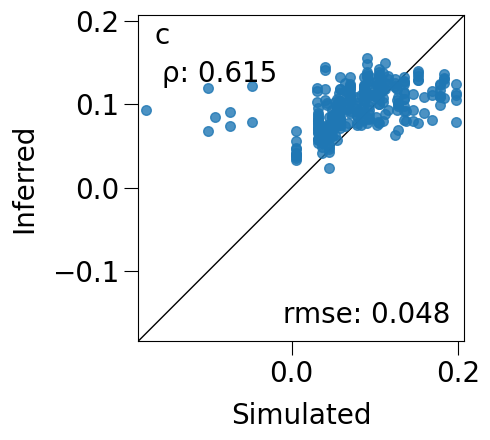

In [62]:
plot_LD_results(r2_vary_model_2d_conv, r2_varied_test_tensors, r2_varied_test_labels, "../r2_vary_conv2d_model_graphs")

In [69]:
# New changes to the r^2 CNN 2/10/24
def create_r2_2d_conv_without_drop(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv2D(
            filters=64,
            kernel_size=5,
            strides=(2,2),
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2)) 
    model.add(layers.AveragePooling2D(pool_size=(5, 15))) 
    model.add(layers.Conv2D(filters=16, kernel_size=(1,3), strides=2, activation="relu")) 
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

r2_vary_model_2d_conv_no_drop, kwargs = create_r2_2d_conv_without_drop(r2_varied_train_tensors.shape[1:], 3) 

kwargs.update(
    x=r2_varied_train_tensors,
    y=r2_varied_train_labels,
    epochs=30,
)

# callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
# r2_vary_model_2d_conv_no_drop.fit(**kwargs, callbacks=[callback])

r2_vary_model_2d_conv_no_drop.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 8, 148, 64)        3264      
                                                                 
 average_pooling2d_60 (Avera  (None, 1, 9, 64)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 4, 16)          3088      
                                                                 
 average_pooling2d_61 (Avera  (None, 1, 1, 16)         0         
 gePooling2D)                                                    
                                                                 
 global_average_pooling2d_26  (None, 16)               0         
  (GlobalAveragePooling2D)                                       
                                                     

In [70]:
callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
r2_vary_model_2d_conv_no_drop.fit(**kwargs, callbacks=[callback])

Epoch 1/30
94/95 [============================>.] - ETA: 0s - loss: 0.9012 - mean_squared_error: 0.9012WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 4s 30ms/step - loss: 0.8996 - mean_squared_error: 0.8996
Epoch 2/30
93/95 [============================>.] - ETA: 0s - loss: 0.6111 - mean_squared_error: 0.6111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.6224 - mean_squared_error: 0.6224
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 0.5724 - mean_squared_error: 0.5724WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5691 - mean_squared_error: 0.5691
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 0.5407 - mean_squared_error: 0.5407WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.5449 - mean_squared_error: 0.5449
Epoch 5/30
95/95 [==============================] - ETA: 0s - loss: 0.5410 - mean_squared_error: 0.5410WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.5410 - mean_squared_error: 0.5410
Epoch 6/30
94/95 [============================>.] - ETA: 0s - loss: 0.5319 - mean_squared_error: 0.5319WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.5330 - mean_squared_error: 0.5330
Epoch 7/30
95/95 [==============================] - ETA: 0s - loss: 0.5193 - mean_squared_error: 0.5193WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.5193 - mean_squared_error: 0.5193
Epoch 8/30
94/95 [============================>.] - ETA: 0s - loss: 0.4993 - mean_squared_error: 0.4993WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 20ms/step - loss: 0.4971 - mean_squared_error: 0.4971
Epoch 9/30
93/95 [============================>.] - ETA: 0s - loss: 0.4849 - mean_squared_error: 0.4849WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.4862 - mean_squared_error: 0.4862
Epoch 10/30
93/95 [============================>.] - ETA: 0s - loss: 0.4748 - mean_squared_error: 0.4748WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 20ms/step - loss: 0.4778 - mean_squared_error: 0.4778
Epoch 11/30
94/95 [============================>.] - ETA: 0s - loss: 0.4842 - mean_squared_error: 0.4842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4818 - mean_squared_error: 0.4818
Epoch 12/30
94/95 [============================>.] - ETA: 0s - loss: 0.4762 - mean_squared_error: 0.4762WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4766 - mean_squared_error: 0.4766
Epoch 13/30
94/95 [============================>.] - ETA: 0s - loss: 0.4749 - mean_squared_error: 0.4749WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4721 - mean_squared_error: 0.4721
Epoch 14/30
94/95 [============================>.] - ETA: 0s - loss: 0.4696 - mean_squared_error: 0.4696WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4688 - mean_squared_error: 0.4688
Epoch 15/30
94/95 [============================>.] - ETA: 0s - loss: 0.4740 - mean_squared_error: 0.4740WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 21ms/step - loss: 0.4722 - mean_squared_error: 0.4722
Epoch 16/30
94/95 [============================>.] - ETA: 0s - loss: 0.4721 - mean_squared_error: 0.4721WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4702 - mean_squared_error: 0.4702
Epoch 17/30
93/95 [============================>.] - ETA: 0s - loss: 0.4676 - mean_squared_error: 0.4676WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 22ms/step - loss: 0.4652 - mean_squared_error: 0.4652
Epoch 18/30
93/95 [============================>.] - ETA: 0s - loss: 0.4634 - mean_squared_error: 0.4634WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 20ms/step - loss: 0.4615 - mean_squared_error: 0.4615
Epoch 19/30
94/95 [============================>.] - ETA: 0s - loss: 0.4622 - mean_squared_error: 0.4622WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4606 - mean_squared_error: 0.4606
Epoch 20/30
93/95 [============================>.] - ETA: 0s - loss: 0.4527 - mean_squared_error: 0.4527WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4569 - mean_squared_error: 0.4569
Epoch 21/30
94/95 [============================>.] - ETA: 0s - loss: 0.4565 - mean_squared_error: 0.4565WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4542 - mean_squared_error: 0.4542
Epoch 22/30
94/95 [============================>.] - ETA: 0s - loss: 0.4575 - mean_squared_error: 0.4575WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4573 - mean_squared_error: 0.4573
Epoch 23/30
94/95 [============================>.] - ETA: 0s - loss: 0.4534 - mean_squared_error: 0.4534WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4533 - mean_squared_error: 0.4533
Epoch 24/30
93/95 [============================>.] - ETA: 0s - loss: 0.4438 - mean_squared_error: 0.4438WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4489 - mean_squared_error: 0.4489
Epoch 25/30
94/95 [============================>.] - ETA: 0s - loss: 0.4486 - mean_squared_error: 0.4486WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4473 - mean_squared_error: 0.4473
Epoch 26/30
93/95 [============================>.] - ETA: 0s - loss: 0.4470 - mean_squared_error: 0.4470WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4453 - mean_squared_error: 0.4453
Epoch 27/30
94/95 [============================>.] - ETA: 0s - loss: 0.4445 - mean_squared_error: 0.4445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 18ms/step - loss: 0.4424 - mean_squared_error: 0.4424
Epoch 28/30
94/95 [============================>.] - ETA: 0s - loss: 0.4418 - mean_squared_error: 0.4418WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4409 - mean_squared_error: 0.4409
Epoch 29/30
94/95 [============================>.] - ETA: 0s - loss: 0.4446 - mean_squared_error: 0.4446WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4446 - mean_squared_error: 0.4446
Epoch 30/30
94/95 [============================>.] - ETA: 0s - loss: 0.4404 - mean_squared_error: 0.4404WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


95/95 [==============================] - 2s 19ms/step - loss: 0.4385 - mean_squared_error: 0.4385


10/10 [==============================] - 0s 6ms/step


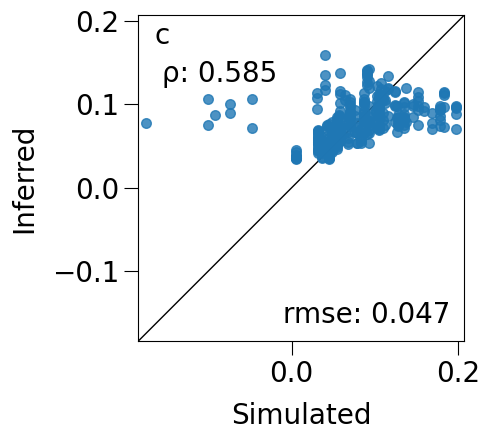

In [71]:
plot_LD_results(r2_vary_model_2d_conv_no_drop, r2_varied_test_tensors, r2_varied_test_labels, "../r2_vary_conv2d_model_no_drop_graphs")

10/10 [==============================] - 0s 7ms/step


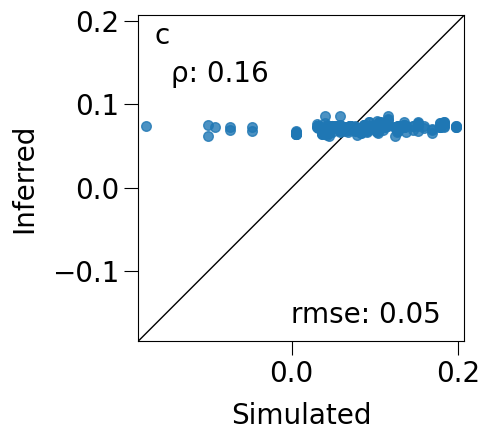

In [73]:
# One with dropout layer 
plot_LD_results(r2_vary_model_2d_conv, r2_varied_test_free_scrambled_tensors, r2_varied_test_labels, "../r2_vary_conv2d_plus_drop_model_graphs/Free_Scramble_Test")
plot_LD_results(r2_vary_model_2d_conv, r2_varied_test_partition_by_row_tensors, r2_varied_test_labels, "../r2_vary_conv2d_plus_drop_model_graphs/Parition_by_row_Test")


10/10 [==============================] - 0s 6ms/step


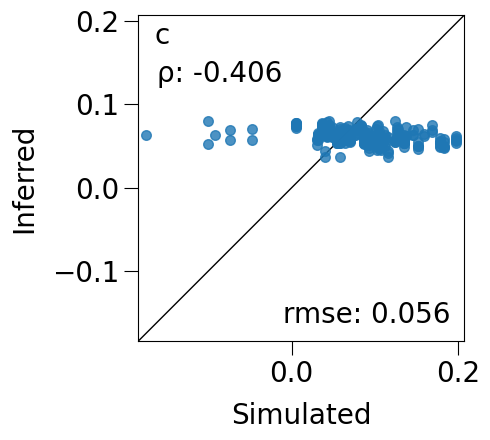

In [72]:
plot_LD_results(r2_vary_model_2d_conv_no_drop, r2_varied_test_free_scrambled_tensors, r2_varied_test_labels, "../r2_vary_conv2d_model_no_drop_graphs/Free_scramble_test")
plot_LD_results(r2_vary_model_2d_conv_no_drop, r2_varied_test_partition_by_row_tensors, r2_varied_test_labels, "../r2_vary_conv2d_model_no_drop_graphs/Parition_by_row_test")